In [1]:
"""
If the image size is divided by block size and the rest is not 0, a problem occurs.
"""

# pip install pycryptodome
from Crypto.Cipher import AES
from Crypto import Random

key = Random.new().read(AES.block_size)
iv = Random.new().read(AES.block_size)

def encrypt_frames(arr,key_encrypt,iv_encrypt):
    row, col, chn = arr.shape    
    arr = arr.tobytes()
    
    cipher_text=np.array([])
    cipher = AES.new(key_encrypt, AES.MODE_CBC,iv_encrypt)
    cipher_text=cipher.encrypt(arr)
    
    cipher_text = np.frombuffer(cipher_text,dtype=np.uint8)
    cipher_text = cipher_text.reshape(row, col, chn)
    return(cipher_text)

def decrypt_frames(arr,key_encrypt,iv_encrypt):
    row, col, chn = arr.shape
    arr = arr.tobytes()
    
    cipher_text=np.array([])
    cipher = AES.new(key_encrypt, AES.MODE_CBC,iv_encrypt)
    cipher_text=cipher.decrypt(arr)
    
    cipher_text = np.frombuffer(cipher_text,dtype=np.uint8)
    cipher_text = cipher_text.reshape(row, col, chn)    
    return(cipher_text)

In [2]:
import tkinter as tk
from tkinter import filedialog
import cv2  # pip install opencv-python
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The image_selector function was created by someone else, and it was copied a long time ago, so I can't remember the source.
def image_selector():  # returns path to selected image
    path = "NULL"
    root = tk.Tk()
    root.withdraw()  # we don't want a full GUI, so keep the root window from appearing
    path = filedialog.askopenfilename()  # show an "Open" dialog box and return the path to the selected file
    if path != "NULL":
        print("Image loaded!")
        img = cv2.imread(path)
        plt.figure(figsize=(10, 10))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()
    else:
        print("Error Image not loaded!")
    return img

Image loaded!


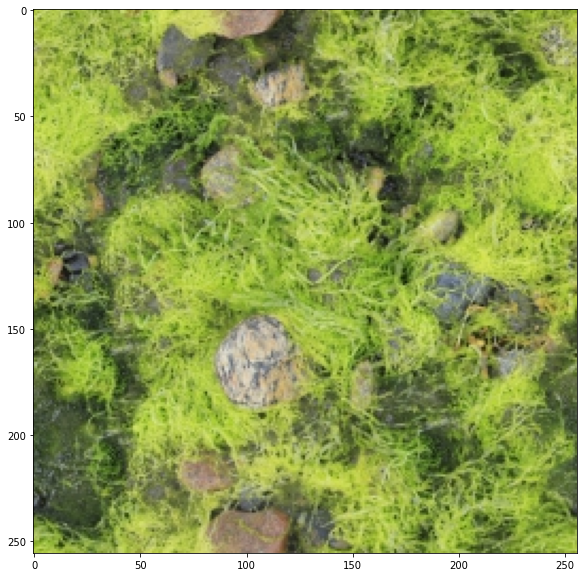

In [3]:
original_img = image_selector()

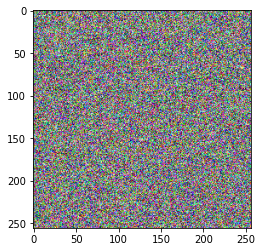

In [4]:
# AES encrypted image
enc_img = encrypt_frames(original_img, key, iv)

plt.imshow(cv2.cvtColor(enc_img, cv2.IMREAD_ANYCOLOR))
plt.show()

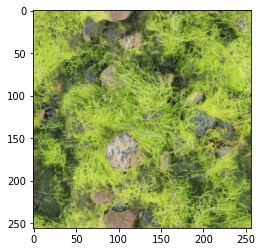

In [5]:
# AES decrypted image
dec_img = decrypt_frames(enc_img, key, iv)

plt.imshow(cv2.cvtColor(dec_img, cv2.IMREAD_ANYCOLOR))
plt.show()